In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Generating random linear data
#There will be 50 data points ranging from 0 to 50
x=np.linspace(0,50,50)
y=np.linspace(0,50,50)

# Adding noise to the random linear data
x+=np.random.uniform(-4,4,50)
y+=np.random.uniform(-4,4,50)
n=len(x)

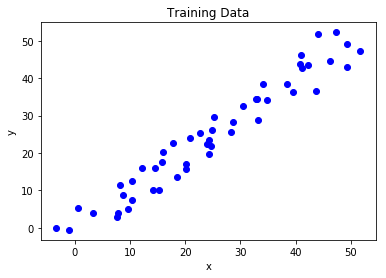

In [3]:
# Plot of Training Data
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [4]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [5]:
W=tf.Variable(np.random.randn(),name="W")
b=tf.Variable(np.random.randn(),name="b")
learning_rate=0.01
training_epochs=1500

In [6]:
#Hypothesis
y_pred=tf.add(tf.multiply(X,W),b)

# Mean Squared Error Cost Function
cost = tf.div(tf.reduce_sum(tf.square(y_pred-Y)),(2 * n))

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()


W0825 23:58:41.612272 140680292288320 deprecation.py:323] From <ipython-input-6-3d89816549bb>:5: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [7]:
with tf.Session() as sess:
  merged = tf.summary.merge_all()
  writer = tf.summary.FileWriter("logs", sess.graph)
  # Initializing the Variables
  sess.run(init)
  # Iterating through all the epochs
  for epoch in range(training_epochs):
  # Feeding each data point into the optimizer using Feed Dictionary
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})
# Displaying the result after every 50 epochs
    if (epoch+1) % 50 == 0:
# Calculating the cost a every epoch
      c = sess.run(cost, feed_dict = {X : x, Y : y})
      print("Epoch", (epoch+1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)  

('Epoch', 50, ': cost =', 6.543261, 'W =', 0.9649837, 'b =', 0.84734225)
('Epoch', 100, ': cost =', 6.547008, 'W =', 0.96442777, 'b =', 0.87471145)
('Epoch', 150, ': cost =', 6.5505924, 'W =', 0.9639272, 'b =', 0.89934903)
('Epoch', 200, ': cost =', 6.553989, 'W =', 0.96347666, 'b =', 0.9215252)
('Epoch', 250, ': cost =', 6.5571866, 'W =', 0.96307117, 'b =', 0.9414879)
('Epoch', 300, ': cost =', 6.5601783, 'W =', 0.96270615, 'b =', 0.9594561)
('Epoch', 350, ': cost =', 6.5629606, 'W =', 0.9623775, 'b =', 0.97563154)
('Epoch', 400, ': cost =', 6.565541, 'W =', 0.96208173, 'b =', 0.99019253)
('Epoch', 450, ': cost =', 6.567922, 'W =', 0.9618154, 'b =', 1.0032998)
('Epoch', 500, ': cost =', 6.570116, 'W =', 0.96157575, 'b =', 1.0150999)
('Epoch', 550, ': cost =', 6.572129, 'W =', 0.9613599, 'b =', 1.0257221)
('Epoch', 600, ': cost =', 6.5739713, 'W =', 0.9611657, 'b =', 1.0352817)
('Epoch', 650, ': cost =', 6.5756574, 'W =', 0.96099097, 'b =', 1.043885)
('Epoch', 700, ': cost =', 6.577196

In [8]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

('Training cost =', 6.589097, 'Weight =', 0.9596781, 'bias =', 1.1085069, '\n')


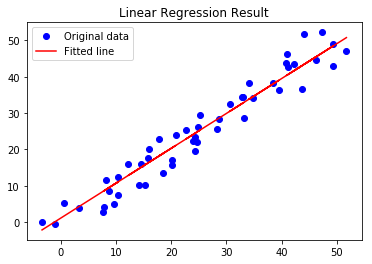

In [9]:
plt.plot(x, y,'ro', color = 'blue', label ='Original data')
plt.plot(x, predictions, color = 'red', label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import r2_score
R2 = r2_score(y, predictions, multioutput='variance_weighted')
print("R2 value:",R2)

('R2 value:', 0.9403431869240653)


In [11]:
'''Predict Y value for X'''
data=[3.987, 19.235, 23.098, 36.5, 22.765]
for x1 in data:
  predictions = weight * x1 + bias
  print("Training cost =", training_cost, "Predictions :",predictions,'\n')

('Training cost =', 6.589097, 'Predictions :', 4.934743556320667, '\n')
('Training cost =', 6.589097, 'Predictions :', 19.56791543036699, '\n')
('Training cost =', 6.589097, 'Predictions :', 23.27515198266506, '\n')
('Training cost =', 6.589097, 'Predictions :', 36.13675805926323, '\n')
('Training cost =', 6.589097, 'Predictions :', 22.955579170882704, '\n')


In [12]:
'''Change the stopping criterion from number of epochs to difference in cost function.'''
with tf.Session() as sess:
  merged = tf.summary.merge_all()
  writer = tf.summary.FileWriter("logs", sess.graph)
  sess.run(init)
  itr=1
  delta=0.0
  while itr:
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})
    c = sess.run(cost, feed_dict = {X : x, Y : y})
    if itr % 50 == 0:
      print("Epoch", itr, ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
    if(abs(c-delta)<=0.000001):
      break
    delta=c
    itr+=1
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)


('Epoch', 50, ': cost =', 6.543261, 'W =', 0.9649837, 'b =', 0.84734225)
('Epoch', 100, ': cost =', 6.547008, 'W =', 0.96442777, 'b =', 0.87471145)
('Epoch', 150, ': cost =', 6.5505924, 'W =', 0.9639272, 'b =', 0.89934903)
('Epoch', 200, ': cost =', 6.553989, 'W =', 0.96347666, 'b =', 0.9215252)
('Epoch', 250, ': cost =', 6.5571866, 'W =', 0.96307117, 'b =', 0.9414879)
('Epoch', 300, ': cost =', 6.5601783, 'W =', 0.96270615, 'b =', 0.9594561)
('Epoch', 350, ': cost =', 6.5629606, 'W =', 0.9623775, 'b =', 0.97563154)
('Epoch', 400, ': cost =', 6.565541, 'W =', 0.96208173, 'b =', 0.99019253)
('Epoch', 450, ': cost =', 6.567922, 'W =', 0.9618154, 'b =', 1.0032998)
('Epoch', 500, ': cost =', 6.570116, 'W =', 0.96157575, 'b =', 1.0150999)
('Epoch', 550, ': cost =', 6.572129, 'W =', 0.9613599, 'b =', 1.0257221)
('Epoch', 600, ': cost =', 6.5739713, 'W =', 0.9611657, 'b =', 1.0352817)
('Epoch', 650, ': cost =', 6.5756574, 'W =', 0.96099097, 'b =', 1.043885)
('Epoch', 700, ': cost =', 6.577196

In [13]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

('Training cost =', 6.589971, 'Weight =', 0.95959693, 'bias =', 1.1125052, '\n')


In [14]:
'''Different alpha (learning_rate) values and corresponding R2 score
learing_rate:0.01  --> R2 score : 0.9561711345220001
learing_rate:0.05  --> R2 score : 0.8467526959221892
learing_rate:0.1   --> R2 score : NaN
learing_rate:0.5   --> R2 score : NaN
'''

'Different alpha (learning_rate) values and corresponding R2 score\nlearing_rate:0.01  --> R2 score : 0.9561711345220001\nlearing_rate:0.05  --> R2 score : 0.8467526959221892\nlearing_rate:0.1   --> R2 score : NaN\nlearing_rate:0.5   --> R2 score : NaN\n'

In [15]:
'''Perform the Linear Regression on some other dataset.'''

'Perform the Linear Regression on some other dataset.'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [17]:
boston = datasets.load_boston()
df=pd.DataFrame(boston.data)
df.columns=boston.feature_names
df['PRICE']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
correlation_matrix = df.corr().round(2)
correlation_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


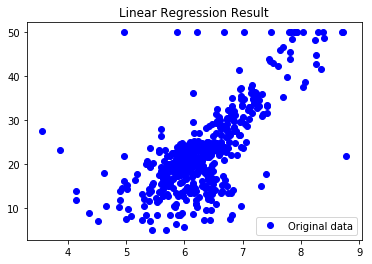

In [19]:
#sns.heatmap(correlation_matrix)
plt.plot(df['RM'], df['PRICE'],'ro', color = 'blue', label ='Original data')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [20]:
X=df[['RM']]
Y=df[['PRICE']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Y_predict = regr.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
R2 score is 0.693839940155




In [23]:
X=df[['LSTAT']]
Y=df[['PRICE']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
Y_predict = regr.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
R2 score is 0.50415237289


